In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import inspect
import cv2
import PIL
def build_autoencoder(image,code_size):
    img_shape = image.shape
    
    encoder = tf.keras.Sequential([
        tf.keras.layers.InputLayer(img_shape),
        # Convolutional layer with 64 filters of size 3x3 and ReLU activation
        tf.keras.layers.Conv2D(64*64, kernel_size=3, activation='relu',padding='same'),
        # Max pooling layer with pool size of 2x2 and stride of 2
        tf.keras.layers.MaxPool2D(pool_size=2,padding='same'),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(code_size, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))    

        ])


    
    decoder = tf.keras.Sequential()
    decoder.add(tf.keras.layers.InputLayer(code_size,))
    decoder.add(tf.keras.layers.Conv2D(64,3, activation='relu', padding='same'))
    decoder.add(tf.keras.layers.UpSampling2D(2))
    decoder.add(tf.keras.layers.Conv2D(512,3, activation='sigmoid', padding='same'))
    decoder.add(tf.keras.layers.Dense(np.prod(img_shape)))
    decoder.add(tf.keras.layers.Reshape(img_shape))

    return encoder,decoder

def build_autoencoder2(image, code_size):
    # The encoder
    img_shape = image.shape

    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

def image2grayscale(image):
    R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B

    imgGray = imgGray.astype('float32') / 255.
    imgGray = imgGray.reshape((len(imgGray), np.prod(imgGray.shape[1:])))
    return imgGray

def show_image(x):
    plt.imshow(np.clip(x+.5, 0, 1))


def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[np.newaxis, ...])
    #ßßreco = decoder.predict(code[None])[0]
    reco = code.squeeze()

    plt.subplot(1,3,1)
    plt.title("Original")

    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()


def train_autoencoder(image,code_size):
    image = image.astype('float32') / 255. - 0.5


    encoder, decoder = build_autoencoder(image, code_size)

    inp = tf.keras.layers.Input(image.shape)
    code = encoder(inp)
    reconstruction = decoder(code)

    autoencoder = tf.keras.models.Model(inp,reconstruction)
    autoencoder.compile(optimizer='adamax', metrics=['accuracy'],
                    loss='mean_squared_error')

    print(autoencoder.summary())
    
    history = autoencoder.fit(image[np.newaxis, ...], image[np.newaxis, ...], epochs=20)
    
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    return encoder,decoder
    



187500
(250, 250, 3)


ValueError: Input 0 of layer "conv2d_12" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 32)

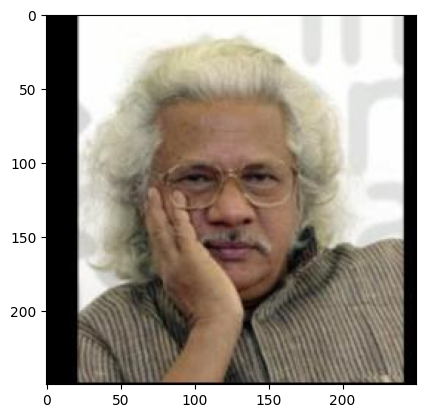

In [19]:
image = plt.imread('face.jpg')
plt.imshow(image)
print(image.size) 
print(image.shape) 



train_encoder, train_decoder = train_autoencoder(image,32)
image_encode_decode.visualize(image,train_encoder,train_decoder)


187500
(250, 250, 3)


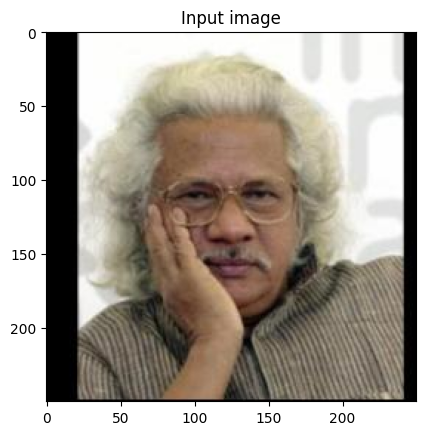

In [20]:
image = plt.imread('face.jpg')
plt.imshow(image)
print(image.size) 
print(image.shape) 

plt.title('Input image')
plt.show()


In [ ]:
train_encoder, train_decoder = train_autoencoder(image,32)
